In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display


In [2]:
# Load your data
odds_df = pd.read_csv("cleaned_all.csv")


In [3]:
def plot_ev_distribution(odds_df, ev_threshold=0.1):
    home_ev_mean = odds_df['Home EV'].mean()
    home_ev_std = odds_df['Home EV'].std()
    away_ev_mean = odds_df['Away EV'].mean()
    away_ev_std = odds_df['Away EV'].std()

    # Print statistics
    print(f"Home EV Mean: {home_ev_mean:.4f}, Home EV Std Dev: {home_ev_std:.4f}")
    print(f"Away EV Mean: {away_ev_mean:.4f}, Away EV Std Dev: {away_ev_std:.4f}")

    # Count EV values
    home_ev_ge_threshold = np.sum(odds_df['Home EV'] >= ev_threshold)
    home_ev_lt_threshold = np.sum(odds_df['Home EV'] < ev_threshold)
    away_ev_ge_threshold = np.sum(odds_df['Away EV'] >= ev_threshold)
    away_ev_lt_threshold = np.sum(odds_df['Away EV'] < ev_threshold)

    print(f"Home EV >= {ev_threshold}: {home_ev_ge_threshold}, Home EV < {ev_threshold}: {home_ev_lt_threshold}")
    print(f"Away EV >= {ev_threshold}: {away_ev_ge_threshold}, Away EV < {ev_threshold}: {away_ev_lt_threshold}")

    # Plotting Home EV
    plt.figure(figsize=(12, 6))
    n, bins, patches = plt.hist(odds_df['Home EV'].dropna(), bins=50, color='gray', edgecolor='black', alpha=0.7)
    plt.title('Distribution of Home EV')
    plt.xlabel('Home EV')
    plt.ylabel('Frequency')

    for patch, left_bin_edge in zip(patches, bins[:-1]):
        if left_bin_edge >= ev_threshold:
            patch.set_facecolor('green')
        else:
            patch.set_facecolor('red')

    plt.show()

    # Plotting Away EV
    plt.figure(figsize=(12, 6))
    n, bins, patches = plt.hist(odds_df['Away EV'].dropna(), bins=50, color='gray', edgecolor='black', alpha=0.7)
    plt.title('Distribution of Away EV')
    plt.xlabel('Away EV')
    plt.ylabel('Frequency')

    for patch, left_bin_edge in zip(patches, bins[:-1]):
        if left_bin_edge >= ev_threshold:
            patch.set_facecolor('green')
        else:
            patch.set_facecolor('red')

    plt.show()


In [4]:
# Create widgets
ev_threshold_slider = widgets.FloatSlider(
    value=0.15,
    min=0.0,
    max=1.0,
    step=0.01,
    description='EV Threshold:',
    continuous_update=False
)

# Function to update the plot based on widget input
def update_ev_plot(ev_threshold):
    plot_ev_distribution(odds_df, ev_threshold)

# Link widget to the function
widgets.interactive(update_ev_plot, ev_threshold=ev_threshold_slider)


interactive(children=(FloatSlider(value=0.15, continuous_update=False, description='EV Threshold:', max=1.0, s…

FloatSlider(value=0.15, continuous_update=False, description='EV Threshold:', max=1.0, step=0.01)

Home EV Mean: -0.0575, Home EV Std Dev: 0.1711
Away EV Mean: -0.0842, Away EV Std Dev: 0.1719
Home EV >= 0.15: 29609, Home EV < 0.15: 260914
Away EV >= 0.15: 23293, Away EV < 0.15: 267233


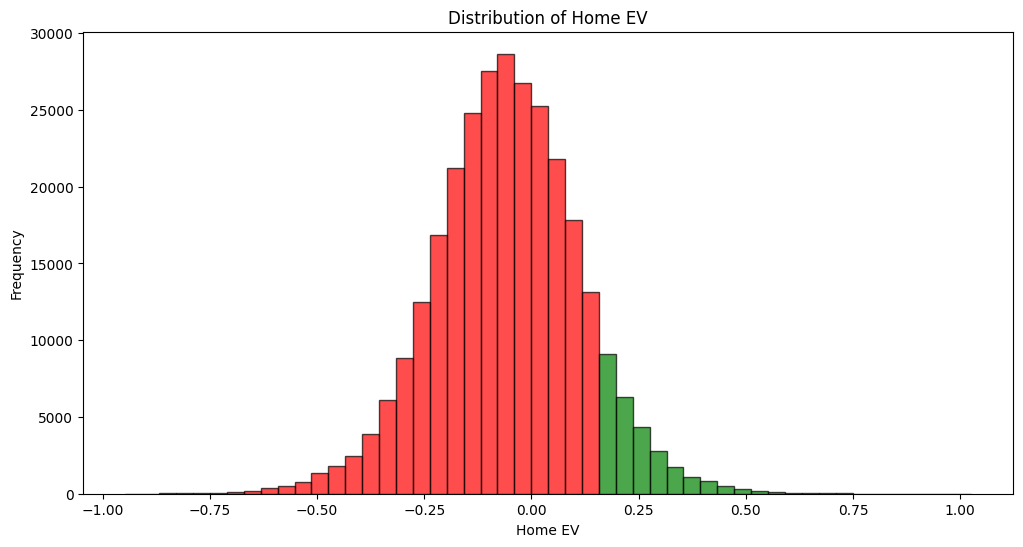

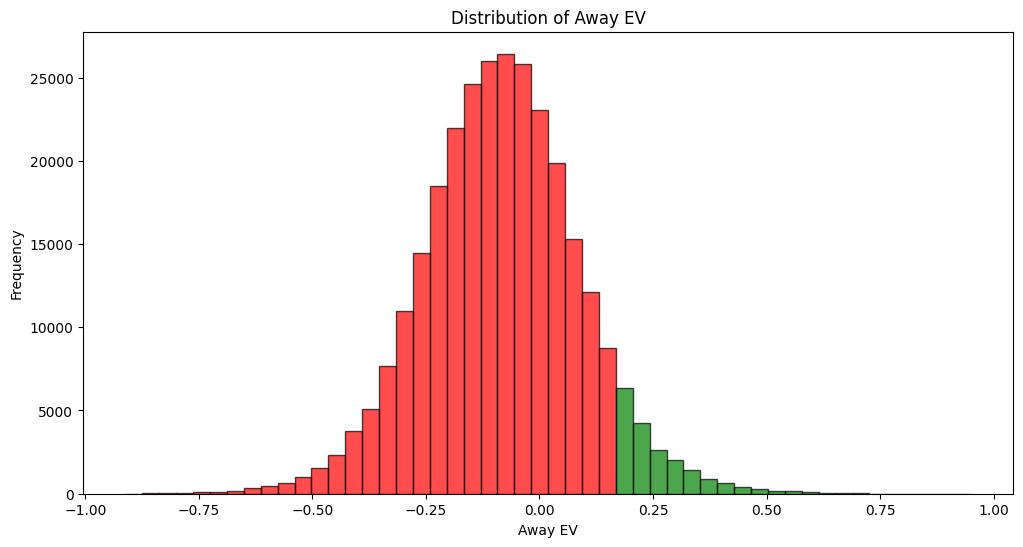

In [5]:
# Display the widget
display(ev_threshold_slider)

# Display the initial plot
plot_ev_distribution(odds_df, ev_threshold_slider.value)


In [6]:
voila ev_graph_visualization.ipynb


SyntaxError: invalid syntax (3815180131.py, line 1)